$\newcommand{\rads}{~rad.s$^{-1}$}$
$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\textrm{e}^{#1}}$
$\newcommand{\glm}[1]{\overline{#1}^L}$
$\newcommand{\di}[0]{\textrm{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\mde}[1]{\frac{\textrm{D} {#1}}{\textrm{D} t}}$
$\newcommand{\mdel}[1]{\textrm{D}_t {#1}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\mathrm i}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\textrm{and}\quad}$
$\newcommand{\oreq}[0]{\quad\textrm{or}\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$

In [53]:
from IPython.display import Image, display, YouTubeVideo

*[Book: chapter 4]*

# Introduction

This chapter is a pivotal chapter in this lecture series, and from past experience, one of the most challenging as well.
It makes the transition between the behaviour of simple oscillators and wave behaviour.
However, these two things look very, very different.
Where does the connection happen?

Here is the pivot, and pretty much the goal of this chapter: when two oscillators are coupled, i.e., the motion of one oscillator is influenced by the motion of the other, any motion that ensues can be thought of as a linear combination of two orthogonal types of motion.
The features of these orthogonal types of motion can be found by solving for the eigenmodes of the matrix, corresponding to the $2\times2$ linear system of equations of the two oscillators.
Each orthogonal mode of motion evolves independently, and its evolution equation is that of a simple harmonic oscillator.
Physically, the most visible manifestation of one single mode of motion is that all parts of the coupled system of oscillators oscillate at the same frequency, while a different mode will have those parts oscillate at different frequencies.

If now an infinite number of oscillators are coupled, the number of orthogonal modes of motions are not to the number of two, but are infinite.
This model can be thought of as a model for a continuous medium, in which waves can propagate.
The superposition of this infinite number of modes can lead to an infinite number of patterns that propagate: waves.
Once again, each of these modes satisfies the same equation as that of a simple harmonic oscillator.

It is the circle of life, PHY293-style: from oscillators to waves, and back to oscillators.
Hopefully, by the end of my lecture series, you will have started to understand this concept.

Finally, throughout the chapter, and in order to simplify the presentation, we neglect damping unless otherwise stated.

But first, let's take a look at the go-to experimental demo of this chapter: the coupled pendulums (also at https://youtu.be/BSC0HG1Nz74 and https://play.library.utoronto.ca/a185a674af2647fc6639939b765f7454).

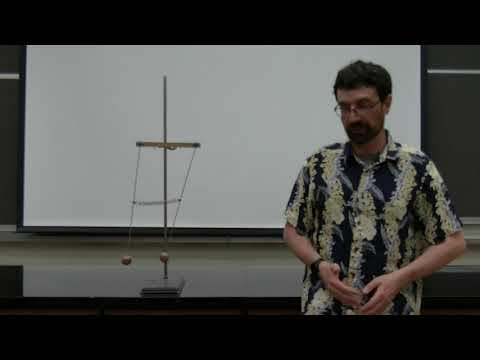

In [54]:
YouTubeVideo('BSC0HG1Nz74', width=560, height=315)

# Expectations

## Remember

* A normal mode of oscillation occurs by definition when all of the components of a coupled system of oscillators oscillate at the same frequency. It is an object that is shared globally, by *all* of the components of the oscillator;
* That the modes are completely independent when the system is linear; they all have their own quantity of energy;
* The definitions of normal frequencies, normal modes, normal coordinates. 
* That the word 'normal' is equivalent to the prefix 'eigen';
* The determinant of a $2\times2$ matrix.
* In the case of an initial value problen, and as for any second-order system, the future evolution of the system can be predicted if one knows all of its physical characteristics (for pendulums, that would be masses, stiffness(es), lengths and gravitational acceleration), the initial positions of each element of the system, and their initial velocities;
* Any solution of an initial value problem (IVP) can be written as a linear combination of the $n$ eigenmodes.

## Understand

* what the process of beating is;
* what a degree of freedom is;
* how projecting can help solving IVPs faster.

## Apply

* A systematic approach to retrieve all of the normal-stuff is to solve an eigenvalue/vector problem. Remember how to cast the equations of motion into a matrix equation, and how to proceed to find all of the eigen-stuff (solve for the roots of the determinant, replace $\omega$ by $\omega_n$ to find the eigenvectors, maybe normalize).
* How to use initial conditions to completely solve an initial value problem;
* How to use projections to solve IVPs.
* Worked examples, tutorials and problem sets.

# Coupled Pendulums

## Simple Pendulum

You have seen in the first problem set that the equation of motion of one undamped pendulum of length $l$ is 
$$ \ddot \theta + \omega_p^2\theta = 0,$$ 
with $\omega^2_p = g/l$ and $\theta$ is the angle of the pendulum with respect to the direction of gravity (See King fig. 1.15).

![Fig. 1: King 1.15](SimplePendulum.png)

Let $x$ be the distance of the mass from the vertical axis (see King fig. 1.15).
We have $x = l \sin\theta$.
In order for the SHO model to be valid, we need the oscillations to remain small, i.e., $\theta \ll 1$ or $\forall t,\ x(t) \ll l$.
In this case, $\sin\theta \approx \theta$, meaning that an equivalent equation of motion for the mass is
$$ \ddot x + \omega_p^2 x = 0. $$

## Two Pendulums and a Spring

### Qualitative considerations

#### Setup

Let me use the example of two pendulums of identical lengths $l$, at the end of which two identical masses $m$ hang.
The masses are attached via a spring of stiffness $k$, as shown on King fig. 4.2. 
When the two masses are at rest, both pendulums are vertical, and the spring is neither stretched or compressed.

![Fig. 2: King 4.2](CoupledPendula.png)

Let's call $B$ the mass on the left, and $A$ the mass on the right.
$x_A$ and $x_B$ are the horizontal distances of each mass from their respective rest positions.

I will show how a systematic mathematical treatment of the equations of motion reveals that there are two "natural", i.e., normal, modes of motion.
But first, let me introduce them qualitatively.

#### Antisymmetric Normal Mode

![Fig. 3: the antisymmetric normal mode](pendulum_syn.gif)

Imagine that at $t=0$, $x_{A0} = x_{B0} = A$, and both masses are held steady initially (no initial velocity).
Since the motion of both masses is initialized in the same way, and both pendulums have the same natural frequency $g/l$, they would naturally oscillate in perfect sync, with same amplitude and in phase:

$$ x_A(t) = x_B(t) = A\cos(\omega_1 t). $$

The spring is neither stretched or compressed, and therefore plays no role in this motion.
Here is why this mode of motion is what we call a normal mode:
**all elements of the coupled system oscillate at the same frequency**, $\omega_1 =\omega_p$ here.

#### Symmetric Normal Mode

![Fig. 4: the symmetric normal mode](pendulum_asyn.gif)

We can come up with another type of motion, for which each mass will oscillate sinusoidally with a well-defined frequency.

Our initial conditions are now $x_{A0} = -x_{B0} = A$, with zero initial velocity again. By symmetry, one can expect that the motion is now described by 

$$ x_A(t) = A\cos(\omega_2 t)\quad\textrm{and}\quad x_{B}(t) = A\cos(\omega_2 t +\pi). $$

I.e., both positions will oscillate $\pi$ rad (or 180$^\circ$) out of phase, and with a single angular frequency $\omega_2$.
What $\omega_2$ is, is not trivial at this point, because it will include effects due to both restoring forces, i.e., weight and the spring tension.
I will derive it soon after, but at this point, I want you to remember that the type of motion is a normal mode because **both pendulums oscillate at the same frequency.**

Could I find a third normal mode?
The answer is no, because there are only two degrees of freedom (the positions of the masses).
Is it obvious?
Again, the answer is no.
The definitive proof is a basic result of linear algebra.
In this chapter, I will simply show that these forms of motion appear naturally out of the equations of motion, that no other normal mode is apparent, and that any other form of motion can be described as a linear combination of both forms of motion.

### Systematic Derivation

![Fig. 5: King 4.7: the general case](GeneralPendulums.png)

#### Basic equations

Let us now drop any symmetry assumption.
The positions $x_A(t)$ and $x_B(t)$ are just what they are.

Let us first focus on mass $A$.
The weight of $A$ projected on the direction of the velocity is $F_{WA} = -mg x_A/l$ (see Problem Set 1).
The force of the spring on the mass is $F_{s\to A} = -k(x_A - x_B)$.
Strictly speaking, this force is aligned with the direction of the spring, but if the angles of displacement are small, we can also say that its projection on the direction of the trajectory is the same.

Newton's 2$^{nd}$ law applied to the mass is therefore 
$$ m\ddot x_A + \frac{mg}{l}x_A + k(x_A - x_B) = 0,$$
or, after division by $m$,
$$ \ddot x_A + \omega_p^2 x_A + \omega_s^2(x_A - x_B) = 0, \hspace{5cm} (1) $$
with $\omega_s^2 = k/m$ (recall that $\omega_p^2 = g/l$).

The same reasoning with mass $B$ yields
$$ \ddot x_B + \omega_p^2x_B + \omega_s^2(x_B - x_A) = 0. \hspace{5cm} (2) $$

Both equations are almost the same, except for the terms that result from the spring tension, which couples the motion of both masses.

#### Change of variables

It is not obvious at first, how to solve for $x_A$ and $x_B$ with this coupling term involved.
The method we use is a **change of variables.**
Define
$$ q_1 = x_A + x_B \andeq q_2 = x_A - x_B.$$

One simple way to make them appear is to sum and subtract eqns. (1) and (2):

* $(1) + (2) \quad\Rightarrow\quad \ddot q_1 + \omega_1^2 q_1 = 0$.

This is the equation for an SHO of angular frequency $\omega_1 = \omega_p$.
The antisymmetric mode of motion that I described earlier on was also oscillating at frequency $\omega_p$, because the spring wasn't stretching or compressing, and the presence of said string was not modifying the pendulum natural frequency $\omega_p$.
And since it was characterized by $x_A(t) = x_B(t)$, it corresponded to $q_1 = 2x_A = 2x_B \neq 0$ and $q_2 = 0$.

*Note: why do I feel the need to introduce $\omega_1$ on top of $\omega_p$? Because in general, no frequency of the normal modes is equal to one of the frequencies of the uncoupled oscillators. In this simple case, yes, but I do not want to give false impressions.*

* $(1) - (2) \quad\Rightarrow\quad \ddot q_2 + \omega_p^2 q_2 + 2\omega_s^2 q_2 = 0.$

Or, defining $\omega_2^2 = \omega_p^2 + 2\omega_s^2$,
$$ \ddot q_2 + \omega_2^2 q_2 = 0. $$
Recall the symmetric oscillation mode: it was characterized by $x_A = -x_B$, and therefore $q_1 = 0$ and $q_2 = 2x_A = -2x_B \neq 0.$
I had also mentioned, back then, that $\omega_2^2$ was not trivial, because it was a mix of the influences of gravity and spring tension.
Indeed, here, $\omega_2$ does contain both the influences of gravity (via $\omega_p^2$) and spring tension (via $2\omega_s^2$).
Therefore, this mode corresponds to the symmetric mode of motion.

#### Comments (to be remembered!)

* Modes of oscillations cannot be thought on as simple oscillations anymore, with one object or easily identifiable quantity such as electric current describing an oscillation. It is a **global** concept in which **all** components of one coupled system of oscillators oscillate in phase, at the same frequency, as if described by a (D or S)HO model.
* The oscillations of each individual component are not independent from each other, but **the modes are completely independent**: there is no trace of $q_1$ in the equation for $q_2$, and vice-versa. It means that if one initiates the coupled system in a funky way, and the coupled system does a weird dance of oscillations, the degree of complexity is actually finite: one mode has a certain amplitude and a certain phase, and the other mode has a certain amplitude, presumably different, and a certain phase shift with the first mode. The pattern of oscillations might look crazy, but there are only two modes, and they don't exchange energy from one to the other as long as the system is linear.
* $q_1$ and $q_2$ are called the **normal coordinates**, or **eigencoordinates**, of the **normal modes**, or **eigenmodes**. Their respective **normal frequencies**, or **eigenfrequencies**, are $\omega_1$ and $\omega_2$.

It is as if there is a physical space, in which physical coordinates $x_A$ and $x_B$ exist, and a dual space, in which $q_1$ and $q_2$ exist.
Both spaces describe the same physical reality, but because they don't describe it in the same way, the "dual" space may be more useful in some cases, including this one.

When you start studying Fourier series and later on Fourier analysis, you may call this dual space the "Fourier" space, or "spectral" space.
It has nothing to do with Halloween, and everything to do with the fact that the visualization of the physical reality in this dual space is called a (Fourier) spectrum, which looks like the display on a sound equalizer (and it is not a coincidence).
I may use the term "Fourier" inadvertently, by force of habit.

### More on the Independence of the Modes

#### General solution as a linear superposition of all modes

A bit more algebra, because I want to drive home the fact that the two modes are independent.
If the coupled system is initiated somewhat randomly, both modes of oscillation will coexist.
They both are solutions of two different SHO equations, and their expressions are therefore
$$q_1 = C_1\cos(\omega_1 t + \phi_1)\andeq q_2 = C_2\cos(\omega_2 t + \phi_2).$$

In physical coordinates, this translates into
$$ x_A = \frac{q_1 + q_2}2 = \frac12\left[C_1\cos(\omega_1 t + \phi_1) + C_2\cos(\omega_2 t + \phi_2) \right],$$
$$ x_B = \frac{q_1 - q_2}2 = \frac12\left[C_1\cos(\omega_1 t + \phi_1) - C_2\cos(\omega_2 t + \phi_2) \right].$$

Meaning that any motion can be considered a linear superposition of the two modes.
For the motion of the antisymmetric mode, $C_2 = 0$, for the symmetric mode, $C_1 = 0$, and in general, $C_1\neq 0$ and $C_2\neq 0$.

#### Energetic independence of the modes

Here I show that the two modes each have a certain amount of energy, and that this energy does not get traded from one mode to the other.
The kinetic energies of $A$ and $B$ are 
$$ K_{A, B} = \frac12 m(\dot x_{A, B})^2, $$
their gravitational potential energies are
$$ U^{(g)}_{A, B} = \frac12\frac{mgx_{A, B}^2}{l} = \frac12 m\omega_p^2 x_{A, B}^2 \quad\textrm{(see PS1 or King § 1.3.2)}, $$

and the potential energy stored in the spring is
$$ U^{(s)}  = \frac12 k (x_A - x_B)^2 = \frac12 m\omega_s^2 (x_A - x_B)^2.$$ 

The total energy stored in the coupled system is therefore
\begin{align*}
    E & = K_A + K_B + U^{(g)}_A + U^{(g)}_B + U^{(s)}, \\ 
      & = \frac m2\left\{(\dot x_A)^2 + (\dot x_B)^2 + \omega_p^2 \left[x_A^2 + x_B^2\right] + \omega_s^2 (x_A - x_B)^2\right\}, \\
      & = E_1 + E_2,
\end{align*}
with 
$$ E_1 = \frac14 m \left[(\dot q_1)^2 + \omega_1^2 q_1^2\right]\andeq E_2 = \frac14 m \left[(\dot q_2)^2 + \omega_2^2 q_2^2\right],$$
which you can check by plugging in the definitions of $q_1$ and $q_2$ in $E_1$ and $E_2$ above, and by 
recalling that $\omega_1^2 = \omega_p^2$ and $\omega_2^2 = \omega_p^2 + 2\omega_s^2$.

As for the coordinates, each reservoir of energy, $E_1$ and $E_2$, is uncoupled from the other one: **there is no exchange of energy from one mode of motion to the other**.
This is true for any system of coupled oscillators, as long as the linear model is valid.

# Beating Phenomenon

When a coupled system contains two frequencies that are very close to each other, and the two modes beat with similar amplitudes, we observe what is called a beating phenomenon in physical space.

Take the solutions we derived earlier in physical space, but let us assume that $\phi_1 = \phi_2 = 0$.
It can be physically realized by choosing initial conditions appropriately.
But more importantly, the phase shifts won't fundamentally change what I am about to describe, so might as well choose easy ones.
$$ x_A = \frac12\left[C_1\cos(\omega_1 t) + C_2\cos(\omega_2 t) \right],$$
$$ x_B = \frac12\left[C_1\cos(\omega_1 t) - C_2\cos(\omega_2 t) \right].$$

Let us also consider the case $C_1 = C_2 = C$, because it is the simplest case that can illustrate the beating phenomenon:

$$ x_A = \frac C2\left[\cos(\omega_1 t) + \cos(\omega_2 t) \right] = C\cos\left(\frac{\omega_1 + \omega_2}2 t\right)\cos\left(\frac{\omega_2 - \omega_1}2 t\right),$$
$$ x_B = \frac C2\left[\cos(\omega_1 t) - \cos(\omega_2 t) \right] = C\sin\left(\frac{\omega_1 + \omega_2}2 t\right)\sin\left(\frac{\omega_2 - \omega_1}2 t\right).$$

***

This went fast, let me do it more slowly (see also https://play.library.utoronto.ca/fdf0002debf728d9825bb4a7cdceb3d4).
A bit of trigonometry:
recall that 
$$\cos(a+b) = \cos a \cos b - \sin a \sin b$$
and 
$$\cos(a-b) = \cos a \cos b + \sin a \sin b.$$
Sum those two and you get:
$$ \cos(a-b) + \cos(a+b) = 2\cos a\cos b . $$
Subtract them and you obtain
$$ \cos(a-b) - \cos(a+b) = 2\sin a\sin b. $$

Now, consider 
$$a - b = \omega_1 t \andeq a + b = \omega_2 t $$
$$\thrfor a = \frac{\omega_1 + \omega_2}2 t \andeq b = \frac{\omega_2 - \omega_1}2 t. $$

Using these formulas yields the result.

***

Or, if we define $\Delta\omega = (\omega_2 - \omega_1)/2$ and $\Omega = (\omega_1 + \omega_2)/2$,
$$ x_A = C\cos\left(\Omega t\right)\cos\left(\Delta\omega t\right),$$
$$ x_B = C\sin\left(\Omega t\right)\sin\left(\Delta\omega t\right).$$

Now, what if $\Delta\omega \ll \omega_1$, $\omega_2$ or $\Omega$? Then, 
$$ x_A \approx C\cos\left(\omega_1 t\right)\cos\left(\Delta\omega t\right),$$
$$ x_B \approx C\sin\left(\omega_1 t\right)\sin\left(\Delta\omega t\right).$$

Because $\Delta\omega \ll \omega_1$, the curves look like an oscillation, oscillating at frequency $\omega_1$, constrained by a sinusoidal envelope of frequency $\Delta\omega$ with a much longer period than that of the fast oscillation (see figs. 6 & 7).

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(False)

def plot_beating(k, l, ratioA):
    """ This function creates two oscillations, and plots each of them
    separately as well as a superposition of
    INPUT:
    l is the length of the pendulums, increasing it increases periods
    k is the stiffness of he spring. Increasing it increases the difference
        between the two frequencies. """
    # basic quantities
    # k = 0.5  # spring stiffness [N/m]
    m = 0.4  # mass [kg]
    g = 9.81  # gravitational acceleration [m/s2]
    # l = .5  # lengths of pendulums  [m]
    C1 = 1.e-1  # amplitude of mode 1 [m]
    C2 = ratioA*C1  # amplitude of mode 2 [m]
    ftsz = 11  # font size on plots
    lnwt = 1
    t_end = 60.

    # derived quantities
    t = np.linspace(0., t_end, 2048)
    omega_p = np.sqrt(g/l)  # natural frequency of uncoupled pendulum
    omega_s = np.sqrt(k/m)  # natural frequency of spring

    omega_1 = omega_p  # 1st eigenfrequency
    omega_2 = np.sqrt(omega_p**2 + 2.*omega_s**2)  # 2nd eigenfrequency
    
    q1 = C1*np.cos(omega_1*t)
    q2 = C2*np.cos(omega_2*t)

    xA = 0.5*(q1 + q2)  # position of A

    Domega = 0.5*(omega_2 - omega_1)  # Delta omega
    envelope = 0.5*C1*((ratioA-1)*np.sin(Domega*t) + 
                       (ratioA+1)*np.cos(Domega*t))  # C*np.cos(Domega*t)

    # 1st plot: each mode individually
    plt.figure(figsize=(12, 4), dpi=100)
    plt.subplot(311)
    ax1 = plt.gca()
    #ax1.axvline(0., color='k')
    ax1.plot(t, q1/2, 'b', linewidth=lnwt)
    ax1.set_xlim([0., t_end])
    ax1.set_ylim([-0.05, 0.05])
    ax1.set_ylabel('$C_1\,\cos(\omega_1 t)/2$', fontsize=ftsz)
    ax1.grid()

    plt.subplot(312, sharex=ax1, sharey=ax1)
    ax2 = plt.gca()
    #ax2.axvline(0., color='k')
    ax2.plot(t, q2/2, 'y', linewidth=lnwt)
    ax2.set_ylabel('$C_2\,\cos(\omega_2 t)/2$', fontsize=ftsz)
    ax2.grid()

    plt.subplot(313, sharex=ax1, sharey=ax1)
    ax3 = plt.gca()
    #ax2.axvline(0., color='k')
    ax3.plot(t, q1/2, 'b', linewidth=lnwt, label='$C_1\,\cos(\omega_1 t)/2$')
    ax3.plot(t, q2/2, 'y', linewidth=lnwt, label='$C_2\,\cos(\omega_2 t)/2$')
    ax3.set_ylabel('Both', fontsize=ftsz)
    ax3.set_xlabel('time [s]', fontsize=ftsz)
    ax3.legend()
    ax3.grid()

    # make these tick labels invisible
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    # plt.savefig('BeatingIndividual.png')
    # plt.close()

    # 2nd plot: adding the two, the beating phenomenon
    plt.figure(figsize=(12, 4), dpi=100)
    ax = plt.gca()
    ax.axvline(0., color='k')
    ax.plot(t, xA, 'g', linewidth=lnwt, label='$x_A(t)$')
    if ratioA > 0.99:
        ax.plot(t, envelope, 'r-.', label='$C\,\cos(\Delta\omega t)$')
        ax.plot(t, -envelope, 'r--', label='$-C\,\cos(\Delta\omega t)$')
    ax.set_ylim([-0.14, 0.16])
    ax.set_xlabel('time [s]', fontsize=ftsz)
    ax.set_ylabel('position [m]', fontsize=ftsz)
    ax.grid()
    ax.legend()

    # annotation to highlight the envelope period
    if ratioA > 0.99:
        T = 2*np.pi/Domega
        ax.axvline(T/4, color='k', linestyle='-.')  # the t=T/2 mark
        ax.axvline(5*T/4, color='k', linestyle='-.')  # the t=3T/2 mark
        ax.annotate(s='', xy=(T/4, -.12), xytext=(5*T/4, -0.12),
                    arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
        ax.text(1.5*np.pi/Domega, -.12, r'$2\pi/\Delta\omega$',
                verticalalignment='center', horizontalalignment='center',
                backgroundcolor='w', fontsize=ftsz)

    # annotation to highlight the fast oscillation period
    T = 4.*np.pi/(omega_2 + omega_1)
    pp = 20.5
    t1 = pp*T
    t2 = (pp+1)*T
    ax.plot([t1]*2, [-C1*np.cos(Domega*t1), 0.13],
            color='k')  # the fast period mark #1
    ax.plot([t2]*2, [-C1*np.cos(Domega*t2), 0.13],
            color='k')  # the fast period mark #2
    ax.annotate(s='', xy=(t1-0.2, .11), xytext=(t2+0.2, 0.11),
                arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax.text((t1+t2)/2, 0.135, r'$2\pi/\Omega$',
            verticalalignment='center', horizontalalignment='center',
            backgroundcolor='w', fontsize=ftsz)

    # finishes
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    # plt.savefig('Beating.png')
    plt.show()
    # plt.close()

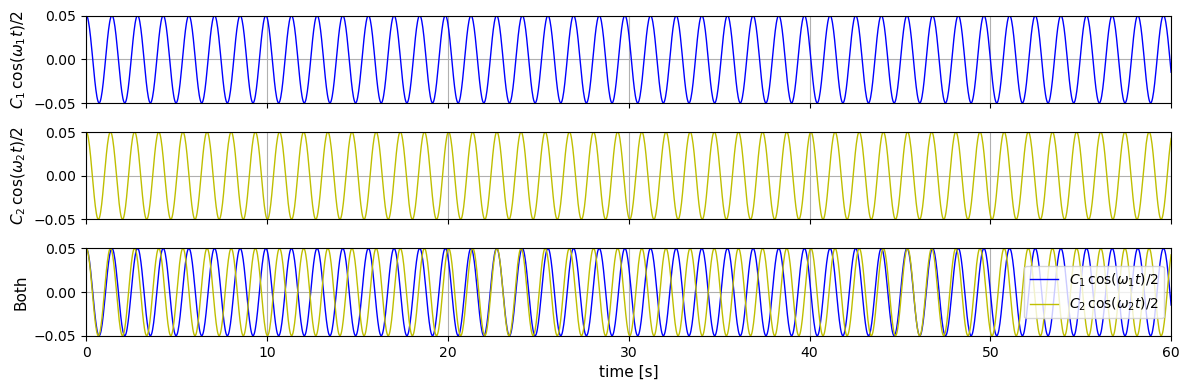

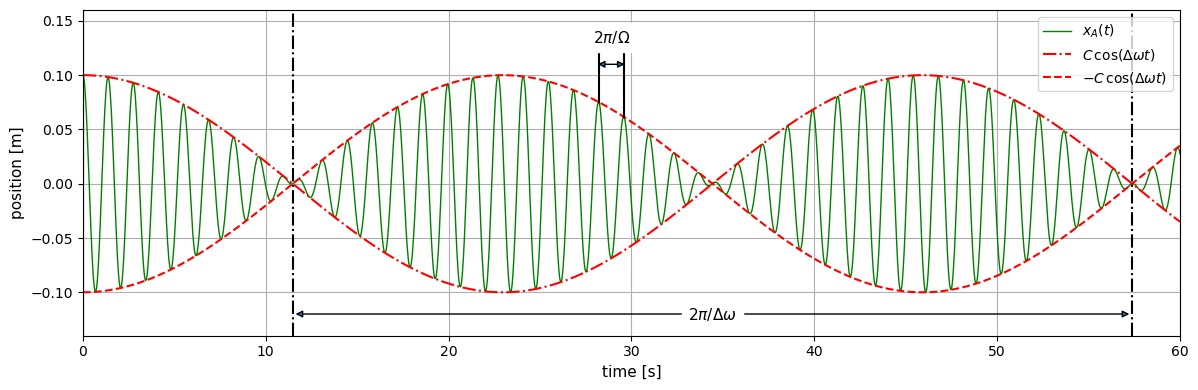

In [56]:
plot_beating(k=0.5, l=0.5, ratioA=1.)  # for pdf export

*Below, on the Jupyter notebook, you can interactively increase the values of $\ell$ to decrease the frequency of both modes, and increase $k$ to increase the difference between the two normal frequencies. You should see that as you increase $k$, the beating phenomenon becomes less and less visible. By that I mean that you will still see beats, but they will be less long, the "bursts" will become closer and closer and the phases when you see an oscillation and phases when you don't will become less cleanly separated. You may want to increase $\ell$ just to make the phenomena better visible.*

In [57]:
from ipywidgets import interact, FloatSlider

In [58]:
interact(plot_beating, k=FloatSlider(min=0.5, max=3., step=.1, value=.5), l=FloatSlider(min=0.5, max=2.5, step=.1, value=.5), ratioA=FloatSlider(min=0.0, max=1., step=.1, value=1.))

interactive(children=(FloatSlider(value=0.5, description='k', max=3.0, min=0.5), FloatSlider(value=0.5, descri…

<function __main__.plot_beating(k, l, ratioA)>

Figs. 6 and 7 above: fig. 6 top and middle: two modes, oscillating with equal amplitude and slightly different frequency. fig. 6, bottom: superposition of the two modes. Fig. 7: sum of the two modes for mass A, i.e., $x_A$, forming a beating pattern.

Below (Jupyter; also at https://youtu.be/CYnR0haH_Qc and https://play.library.utoronto.ca/081230b94886e73ba70d6016aecd227e), you will find a demo, illustrating the phenomenon of beating with acoustic waves (we will see them again near the end of this part of the course).
There is a Khan Academy video that describes the phenomenon qualitatively.

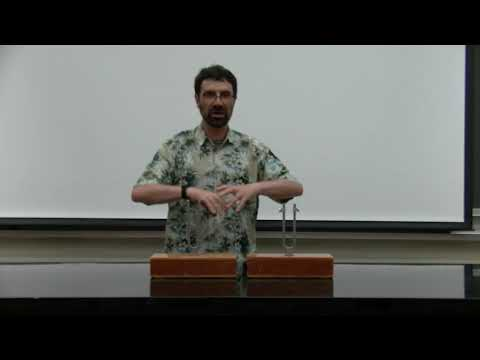

In [59]:
YouTubeVideo('CYnR0haH_Qc', width=560, height=315)

***

*End of 09/29 lecture, beginning of 09/30 lecture.*

***

***

**Worked example: King p. 84.**

***

*Beyond this point, I will not follow King's book closely. You might notice that in his preface, he mentions that his book is designed for a first-year class, for which eigenvalues and eigenvectors would be too advanced a topic. It is our strong opinion (all the instructors involved in PHY293 and 294) that we need to cover this topic in this second-year class, because it is foundational for a lot of other topics that will be tackled in the rest of PHY293-4. If you want a book for help, I can recommend John R. Taylor's "Classical Mechanics" (University Science Books), chapter 11, which I am loosely following.*

***

# General Solution Method

In the previous case, we had only two coupled oscillators, which meant, two degrees of freedom (two normal coordinates).
It was simple enough that we could solve it "by hand", by defining simple normal coordinates, and adding and subtracting the equations of motion.

But as with all things in linear algebra, difficulty increases rapidly with every equation that we add.
For example, what if we coupled 5 oscillators?
Not to mention the infinity of oscillators that approximate a continuous medium.
We need the systematic and powerful approaches that are offered by linear algebra.
And in particular, we will eventually need to use the eigenvector/eigenvalue formalism, which many of you find difficult.
It is, however, a necessary step, and a key aspect of the theory of waves and oscillations.
So, even though I will have to keep it in mind, my best piece of advice is to brace yourselves.

To brush up on linear algebra, you could either pull up your linear algebra notes from last year, or else.
We will essentially do what is described in the following video (Jupyter) or at https://youtu.be/PFDu9oVAE-g?t=315 (and that way, I don't have to record one myself).
Note that if you go the beginning of this video, the author (Grant Sanderson) says (I am actually paraphrasing him) that if finding eigenvalues and eigenvectors feels complicated, it is usually because understanding of vectors and matrices is shaky to begin with.
Fortunately, this particular video is the 10th of 11 videos on linear algrebar (https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).
Careful though, it takes a few hours to go through all of them.

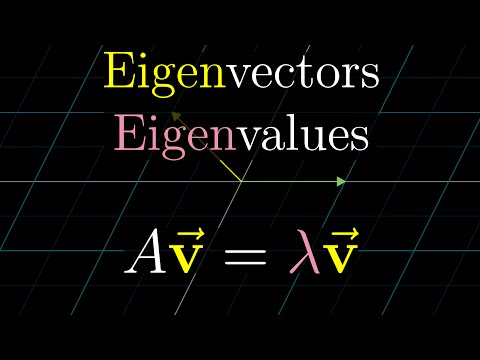

In [60]:
YouTubeVideo('PFDu9oVAE-g', width=560, height=315, start=315)

***

*I will not cover the discussion that follows in class. Reading it may help you understand why and how everything works, but it is beyond what it traditionally expected from 2nd year students.*

## *Results from Linear Algebra*

### *General results*

*Linear algebra can be messy, especially when it comes to whether a matrix is diagonalizable or not. 
Fortunately for us, I will only use a few of the most basic results of linear algebra.*

1. *Finding the eigenvectors and eigenvalues of an $n\times n$ matrix $A$ means finding the vectors $\vec V$ and scalars $\lambda$ such that:
    $$ A \vec V = \lambda \vec V, \oreq (A - \lambda I_n)\vec V = 0,\hspace{5cm}(3)$$
    with $I_n$ the $n\times n$ identity matrix.
2. *Equation (3) has non-trivial (i.e., non-identically zero, i.e., oscillations with non-zero amplitudes in our case) solutions for $\vec V$ if and only if
    $$ \det(A - \lambda I_n) = 0.\hspace{8cm}(4) $$
    The determinant of a matrix is a scalar. Here, it is a polynomial in $\lambda$. It is called the characteristic polynomial, and its roots are the eigenvalues.*
3. *If there is a number $n$ of eigenvalues $\lambda$ that are all distinct from each other, then the matrix is diagonalizable, and the set of the corresponding eigenvectors forms a basis for the space of solutions. In other words, if $\vec V_i$, $i \in \{1\dots{} n\}$ is the complete set of eigenvectors, then any linear combination of them,* 
    $$\sum_{i=1}^n a_i \vec V_i = \vec X$$
    *is a solution of the original problem as well. In all our cases, $a_n \in \mathbb R$. Note that with damping, we could have $a_n \in \mathbb C$.*
    *Furthermore, is $\vec X$ is a solution of eqn. $(3)$, then it can be decomposed as a linear combination of eigenvectors,*
    $$\vec X = \sum_{i=1}^n a_i \vec V_i,$$
    *and this decomposition is unique.*
    *Note: this condition is sufficient, not necessary. Namely, the converse is not true, and a matrix needs not have all* $n$ *eigenvalues distinct from each other to be diagonalizable. But in our cases, they will be, so let's enjoy it.*

### *How does this translate into our results?*

* *First of all, we will have $n = 2$ for two oscillators;*
* *the eigenvectors $\vec V_i$ will have some connection to our normal modes 1 and 2;*
* *the eigenvalues $\lambda_i$ will have some connection to $\omega_{1,2}^2$ (they will be the same actually);*
* *the eigenvectors, in the abstract case, form a basis of the space of solutions. This is a mathematical manifestation of the fact that any motion of the two masses can be decomposed as the linear combination of two modes, as we saw in the previous section;*
* *solving $\det(A - \lambda I_2) = 0$ for $\lambda$ shows the way for solving coupled systems of oscillators systematically. Finding the roots of the polynomial, however messy it might become, will give us $\omega_1$ and $\omega_2$. Once we have them, substitution into the original eqn. (3) will give us $\vec V_1$ and $\vec V_2$.*

*The math will become super messy, but the procedure is well-defined, and easy to make systematic.*

*Resuming the normal course of operations.*

***

## Coupled pendulums

As an illustration of how powerful such an approach is, let me add the extra complexity that the two masses are different, and equal to $m_A$ and $m_B$.
I hope to convince you that while it would have made it difficult in our previous approach, it does not represent any extra difficulty with the eigenvector method.

The equations are therefore
$$ m_A\ddot x_A + \frac{m_A g}{l} x_A + k(x_A - x_B) = 0, \hspace{5cm}(5)$$
$$ m_B\ddot x_B + \frac{m_B g}{l} x_B - k(x_A - x_B) = 0, \hspace{5cm}(6)$$

Now, define a vector
$$
\vec X = 
\begin{bmatrix}
    x_A \\ 
    x_B,
\end{bmatrix}$$
and two matrices
$$
M = 
\begin{bmatrix}
    m_A & 0 \\ 
    0 & m_B
\end{bmatrix}
\andeq
K = 
\begin{bmatrix}
     \frac{m_A g}l + k & -k \\
     -k & \frac{m_B g}l + k
\end{bmatrix}.$$

You can check that
$$ M\ddot{\vec X} + K \vec X = 
\begin{bmatrix}
    m_A\ddot x_A + \frac{m_A g}{l} x_A + k(x_A - x_B) \\
    m_B\ddot x_B + \frac{m_B g}{l} x_B - k(x_A - x_B)
\end{bmatrix}
= 
\begin{bmatrix}
    0 \\
    0
\end{bmatrix},$$
or, more simply, that 
$$\boxed{ M\ddot{\vec X} + K \vec X = 0. }$$

This is our new equation of motion.
It strongly resembles the SHO equation, and its resolution does involve the same steps:

1. assume $\vec X = \vec A \cos(\omega t + \phi)$,
2. substitute in the EOM and solve for $\omega$,
3. use initial conditions to solve for $\vec A$ and $\phi$.

### The first step...
... implies that $\ddot{\vec X} = -\omega^2 \vec X$.
Moreover, $M\ddot{\vec X} = M(-\omega^2 \vec X) = -\omega^2M \vec X$ because the algebra is linear.

### For the second step (solving for $\omega$),
$$M\ddot{\vec X} + K \vec X = -\omega^2 M \vec X + K\vec X = \boxed{\left(K -\omega^2 M\right)\vec X = 0.} \hspace{4cm} (7) $$

Let me recall one of the most important results of linear algebra: **A matrix equation** $\bs{\textsf{R}V = 0}$ **has non-trivial (i.e., non-identically zero) solutions if and only if** $\bs{\det[\textsf{R}] =0}$, as I stated in a different form around eqn. (4).
Physically, trivial solutions are zero-amplitude oscillations of each mass position or of each mode.
Trivially speaking, it is nothing.

The matrices $M$ and $K$ both contain elements that are determined by the physics of the system: masses stiffness, length of pendulum and gravitational acceleration.
The only parameter that can be varied is therefore $\omega$, and it is $\omega$ we are solving for.

Mathematically, this step corresponds to finding the **eigenvalues** of eqn. $(7)$.
It looks different from eqn. $(3)$ though.
However, we can cast our equation in this form very easily by multiplying it by 
$$ M^{-1} = 
\begin{bmatrix}
    1/m_A & 0 \\
    0 & 1/m_B
\end{bmatrix},
$$
i.e.,
$$
M^{-1}K \vec X = \omega^2 \vec X,
$$
which looks like a standard eigenvalue problem. The two ways of writing it are strictly equivalent, the form above would appear if I divided eqns. $(5)$ and $(6)$ by $m_A$ and $m_B$, respectively.

We will also need the following formula:
$$\boxed{ \det\left(
\begin{bmatrix}
    a & b \\
    c & d
\end{bmatrix}
\right) = ad - bc} \quad\textrm{(which I expect you to remember!!!)}.$$

I am going to do it by hand once, but the real advantage to this method is that it is fairly easy to ask a symbolic calculator or symbolic math software to solve for it. I will do it later, but for now, it is instructional to do it by hand.

Here we go:
\begin{align*}
    0 = \det(K - \omega^2 M) & = \det\left(
                                \begin{bmatrix}
                                    \frac{m_A g}l + k - \omega^2 m_A & -k \\
                                    -k & \frac{m_B g}l + k - \omega^2 m_B
                                \end{bmatrix}\right) \\
                         & = \left(\frac{m_A g}l + k - \omega^2 m_A\right)\left(\frac{m_B g}l + k - \omega^2 m_B\right) - k^2 \\
                         & = m_A m_B \left[\left(\omega_p^2 + \omega_{sA}^2 - \omega^2 \right)\left(\omega_p^2 + \omega_{sB}^2 - \omega^2\right) - \omega_{sA}^2\omega_{sB}^2\right],
\end{align*}

with $\omega_p^2 = g/l$, $\omega_{sA}^2 = k/m_A$ and $\omega_{sB}^2 = k/m_B$.
It is a second-degree polynomial in $\omega^2$, which is not technically hard to solve, but this is a lot of symbols to keep track of.

Let us define $\Omega^2 = \omega_p^2 + \omega_A^2 + \omega_B^2$.
If $m_A = m_B$, then $\omega_{sA}^2 = \omega_{sB}^2 = \omega_s^2$ and $\Omega^2 = \omega_p^2 + 2\omega_s^2 = \omega_2^2$, which is a good sign.
Let's plug $\Omega^2$ in the last line of the set of equations above (and remember that is has to be equal to zero):
$$\omega_p^2\Omega^2 - \omega^2 \left(\omega_p^2 + \Omega^2\right) + \omega^4 = 0. $$

The determinant of this polynomial is
$$ \Delta = \left(\omega_p^2 + \Omega^2\right)^2 - 4 \omega_p^2\Omega^2 = \left(\omega_p^2 - \Omega^2\right)^2 $$
and its roots are
\begin{align*}
    \omega_1'^2 & = \frac{\omega_p^2 + \Omega^2 - \Omega^2 + \omega_p^2}{2} = \omega_p^2 \\
    \omega_2'^2 & = \frac{\omega_p^2 + \Omega^2 + \Omega^2 - \omega_p^2}{2} = \Omega^2 = \omega_p^2 + \omega_{sA}^2 + \omega_{sB}^2.
\end{align*}

You may notice that $\omega_1'^2 = \omega_1^2$ of the previous case, and that if $m_A = m_B = m$, then $\omega_2'^2 = \omega_2^2$.
These are our two eigenvalues, which are the squares of the normal frequencies!

Also, $\omega_1'^2 \neq \omega_2'^2$. Therefore, based on the general results from linear algebra that I recalled earlier, we will have a basis of eigenvectors to decompose all our oscillations onto.

### The third step (solving for $\vec A$ and $\phi$)

#### Polarization of the Eigenvectors

We can actually separate $\vec A$ into $C\vec Y$, with $\|\vec Y\| = 1$.
This makes it easier in the sense that we separate the amplitude of the mode, its strength, or weight, if you will, which resides in $C$ and which is calculated with the knowledge of the initial condition, and $\vec Y$, which is a feature of the matrix $K - \omega^2 M$, or of the physical system, and does not depend on the initial conditions.
However, requiring that $\|\vec Y\| = 1$ is not required in order to solve a problem! I do it, but some textbooks might do it differently.

In this case,
$$ (K - \omega^2 M)\vec X = 0 = C (K - \omega^2 M)\vec Y \cos(\omega t + \phi) \quad\Leftrightarrow\quad (K - \omega^2 M)\vec Y = 0. $$

Let 
$$\vec Y = 
\begin{bmatrix}
    a \\ 
    b
\end{bmatrix}.$$
Looking for the relationship between $a$ and $b$ for a given mode is called looking for the polarization of that mode.

\begin{align*} 
    (K - \omega^2 M)\vec Y & = \begin{bmatrix}
                                \frac{m_A g}l + k - \omega^2 m_A & -k \\
                                -k & \frac{m_B g}l + k - \omega^2 m_B
                            \end{bmatrix}
                            \begin{bmatrix}
                                a \\ 
                                b
                            \end{bmatrix} \\
                           & = \begin{bmatrix}
                                \left(\frac{m_A g}l + k - \omega^2 m_A\right)a - kb \\ 
                                -ka + \left(\frac{m_B g}l + k - \omega^2 m_B\right)b
                            \end{bmatrix} \\
                           & = \begin{bmatrix}
                                   m_A\left[(\omega_p^2 + \omega_{sA}^2 - \omega^2 )a - \omega_{sA}^2 b \right] \\ 
                                   m_B\left[-\omega_{sB}^2 a + (\omega_p^2 + \omega_{sB}^2 - \omega^2 )b\right]
                               \end{bmatrix} = 0 . \hspace{3cm} (8).
\end{align*}

* Case $\omega^2 = \omega_1^2 = \omega_p^2$:
$$ \begin{bmatrix}
        ka - kb \\ 
        -ka + kb
   \end{bmatrix} = 0 \thrfor a = b.$$
*(Notice how the two equations are redundant.)*
Therefore, $a=b$, and since $\|\vec Y\| = \sqrt{a^2 + b^2} = 1$, $a = b= 1/\sqrt{2}$.
This is the antisymmetric mode.
*Note: that the masses are different does not have an impact. This is because the frequency of oscillations of each pendulum does not depend on the mass, attached to each one. Therefore, in this mode, the spring is never stretched or compressed.*

![Fig. 8: the antisymmetric normal mode](pendulum_syn.gif)

* Case $\omega^2 = \omega_2^2 = \omega_p^2 + \omega_{sA}^2 + \omega_{sB}^2$.
I just use the first line in eqn. (8) because the second line is redundant again:
$$ -\omega_{sB}^2a - \omega_{sA}^2 b = 0.$$
Therefore, $\omega_{sB} a = -\omega_{sA}b$.
We get it: if $m_A = m_B = m$, this would be the symmetric mode, with $a = 1/\sqrt{2} = -b$.
With $m_A \neq m_B$, $a$ and $b$ are weighted by some coefficient, i.e., $a = \omega_{sA}^2/\sqrt{\omega_{sA}^4 + \omega_{sB}^4}$, and $b = -\omega_{sB}^2/\sqrt{\omega_{sA}^4 + \omega_{sB}^4}$.

![Fig. 9: the symmetric normal mode, in the case $m_A = m_B$.](pendulum_asyn.gif)

***

*End of 09/30 lecture, beginning of 10/02 lecture.*

***

#### Eigenvectors as a basis for all the solutions



So far, the connection with general linear algebra results is the following.
$\vec Y_1$ and $\vec Y_2$ are eigenvectors of the matrix problem, $\omega_1'^2$ and $\omega_2'^2$ the eigenvalues (or $\omega_1'$ and $\omega_2'$ the eigenfrequencies) and $\vec X_1$ and $\vec X_2$ are the eigenmodes of oscillation.

Based on the results from linear algebra that I recalled earlier, it means that all solutions can be written as a linear combination of these eigenmodes:
$$ \vec X = C_1 \vec Y_1\cos(\omega_1 t + \phi_1) + C_2 \vec Y_2\cos(\omega_2 t + \phi_2). $$

#### Amplitudes ($C$) and phases ($\phi$).

As with every initial value problem, it can get messy.
Let me just do the cases we investigated before, i.e., the worked problem on King p. 84.

In all cases, it was assumed that the masses were released from rest.
We could check that in this case, $\phi_1 = \phi_2 = 0$.
It was also assumed that $m_A = m_B$.

The first example was $x_A = x_B = A$, which meant that the antisymmetric mode was selected by the initial conditions.
In vector form, this means
$$\vec X_0 = \vec X(t=0) = \begin{bmatrix}
    x_A(t=0) \\ 
    x_B(t=0)
\end{bmatrix}
= \begin{bmatrix}
    A \\ 
    A
\end{bmatrix} =  \sqrt{2} A \vec Y_1 + 0\vec Y_2.$$
Bam! No need to do any sort of math, we know right away that the symmetric mode is zero.

The second example was $x_A = -x_B = A$, which meant that the symmetric mode was selected by the initial conditions.
In vector form, this means
$$\vec X_0 =
\begin{bmatrix}
    A \\ 
    -A
\end{bmatrix} =  0\vec Y_1 + \sqrt{2}A\vec Y_2.$$
And again! We know right away that the antisymmetric mode is zero.

### Numerical resolution

This bit is outside of what is expected of you, and will only benefit to those who read the Jupyter notebooks. As a matter of fact, the pdf export of this part will not be intelligible, though I will try to do the demo in class, time permitting. In any case, it is hard to realize the potential of the eigenmode method without realizing how easy it is to implement it numerically, and how it is possible to scale the numbers of oscillators up from there.
So, let's give it a go.

In [62]:
from sympy import *  # here I import the entire symbolic math package
init_printing(use_unicode=True)  # to print pretty

In [63]:
# we need to declare some symbolic quantities
# omega_sA, omega_p, omega = symbols('omega_sA, omega_p, omega', real=True)
g, l = symbols('g, l', real=True)
k, m_A, m_B = symbols('k, m_A, m_B', real=True)

In [64]:
m_A

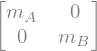

In [65]:
# define the mass matrix
M = Matrix([[m_A, 0],
            [0, m_B]])
M

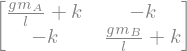

In [66]:
# Define the stiffness matrix
K = Matrix([[m_A*g/l + k, -k],
            [-k, m_B*g/l + k]])
K

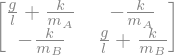

In [67]:
# Compute M**(-1)*K
EVecMat = M.inv()*K
expand(EVecMat)

In [68]:
# A bit of refinement: we can substitute k/m_A by omega_SA, etc.
# but first, we need to declare those symbolic variables
omega_sA, omega_sB = symbols('omega_sA, omega_sB', real=True)
omega_p = Symbol('omega_p', real=True)

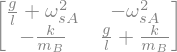

In [69]:
New_EVMat = expand(EVecMat).subs(k/m_A, omega_sA**2); New_EVMat

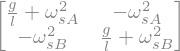

In [70]:
New_EVMat = expand(New_EVMat).subs(k/m_B, omega_sB**2); New_EVMat

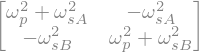

In [71]:
New_EVMat = expand(New_EVMat).subs(g/l, omega_p**2); New_EVMat

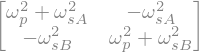

In [72]:
# Or it can be done in one fell swoop:
New_EVMat = (expand(EVecMat).subs(k/m_A, omega_sA**2)
                            .subs(k/m_B, omega_sB**2)
                            .subs(g/l, omega_p**2))
New_EVMat

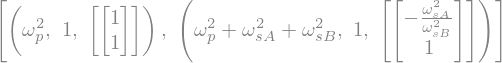

In [73]:
# And now the finishing touch
New_EVMat.eigenvects()

The line above is to be interpreted in the following way:

1. There are two different eigenvalues, $\omega_p^2$ and $\omega_p^2+\omega_{sA}^2+\omega_{sB}^2$,
2. each of these eigenvalues appears only once (this is what the "1" numbers mean in second positions),
3. the eigenvectors are $[1, 1]$ (antisymmetric) and $[-\omega_{sA}^2/\omega_{sB}^2, 1]$ (pseudo-symmetric).
Note how python doesn't care about normalizing the eigenvector norms, and that it used a different sign convention from me. It means that it does not really matter.

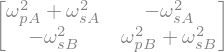

In [74]:
# I can even do it with two different length of pendulums!
l_A, l_B = symbols('l_A, l_B', real=True)
omega_pA, omega_pB = symbols('omega_pA, omega_pB', real=True)

# New stiffness matrix
K_2 = Matrix([[m_A*g/l_A + k, -k],
              [-k, m_B*g/l_B + k]])

# new eigenvector problem
EVecMat_2 = M.inv()*K_2
New_EVMat_2 = (expand(EVecMat_2).subs(k/m_A, omega_sA**2)
                                .subs(k/m_B, omega_sB**2)
                                .subs(g/l_A, omega_pA**2)
                                .subs(g/l_B, omega_pB**2))

New_EVMat_2

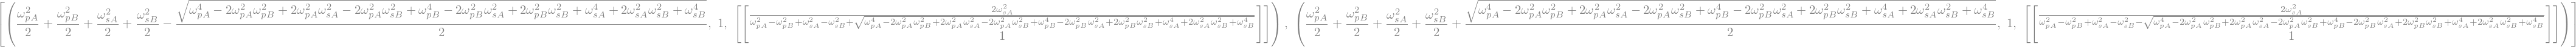

In [75]:
New_EVMat_2.eigenvects()

*Note: the result above is so long that it will not display properly on the pdf version of the notes. Which is the message here: the result is so long, it is not practical to handle it symbolically.*

Obviously, in a practical setting, we would be using a numerical math package, not a symbolic one!
These excruciatingly complicated expressions would become mere numbers, which computers could crunch out.

***



# *Other Examples*

*For the sake of time, I will not cover these in class. You should be able to do the masses coupled by springs by yourself, as a practice problem. It is something I could ask in an exam, and the problem set should feature several derived problems. Ocean tides are outside of the scope of this class, and only serves an illustrative purpose.*

## *Masses Coupled by Springs*

See King fig. 4.11.
![Fig. 10: King 4.11](CoupledMassesSprings.png)

#### *Equations of motion*
*Let both masses be equal this time, and let all the stiffnesses be equal as well.
Equations are:*
$$ m \ddot x_A = -k x_A + k(x_B - x_A) = k x_B - 2 k x_A, $$
$$ m \ddot x_B = -k (x_B - x_A) - kx_B = k x_A - 2 k x_B. $$

*Dividing by $m$:*
$$ \ddot x_A = \omega_s^2 (x_B - 2 x_A), $$
$$ \ddot x_B = \omega_s^2 (x_A - 2 x_B). $$

#### *Form of the solution*
*We are looking for normal modes.
Recall the definition of the normal modes:* **normal modes are modes for which all elements of the coupled system oscillate at the same, unique frequency.**
*Therefore, we look for solutions of the form*
$$ \vec X = C\vec Y \cos(\omega t + \phi). $$

*As before, solving for the eigenvalue problem will yield the $\omega$'s and $\vec Y$'s, while the $C$'s and $\phi$'s are determined in a second time, with the initial conditions.*

#### *Eigenproblem and solving for $\vec Y$ and $\omega$.*
*The previous system of equations becomes*
$$ \omega_s^2 (2x_A - x_B) = \omega^2 x_A, \hspace{6cm} (9a)$$
$$ \omega_s^2 (2x_B - x_A) = \omega^2 x_B, \hspace{6cm} (9b)$$
*which has the form of an eigenproblem.*

*Indeed, defining 
$$ M^{-1}K = \omega_s^2 \begin{bmatrix}
                            2 & -1 \\
                            -1 & 2
                        \end{bmatrix}, $$
We can write the above system of equations as*
$$ M^{-1}K \vec X = \omega^2 \vec X. $$

*We find the eigenfrequencies by finding the roots of the characteristic polynomial, i.e., of*
$$ \det(M^-1 K - \omega^2\mathsf I_2) = 0 = (2\omega_s^2 - \omega^2)^2 - \omega_s^4 = (\omega^2 - \omega_s^2)(\omega^2 - 3\omega^2_s). $$

*Thus, the eigenfrequencies are $\omega_1=\omega_s$ and $\omega_2 = \sqrt{3}\omega_s$.*

*The mode, oscillating at $\omega_1= \omega_s$ can be qualified as "antisymmetric" again. It is the mode for which both masses oscillate in sync, and the central spring is neither stretched or compressed. Therefore, only the external springs stretch or compress, and their natural frequencies of oscillations are simply $\omega_s$.*

*By process of elimination, and because the system is neatly symmetric around the central $x$, we can surmise that the other mode, oscillating at $\omega_2 = \sqrt3 \omega_s$, is a symmetric mode of motion, the motion of both masses being symmetric with respect to the central plane.*

![Fig. 11: the symmetric normal mode](spring_sym.gif)

![Fig. 12: the antisymmetric normal mode.](spring_asyn.gif)

*Defining $\vec Y = [a, b]$, we can find the orientation of the eigenvectors by replacing $x_A$ and $x_B$ by $a$ and $b$ in the system $(9)$, or in only one of the equations since they are redundant.*

*In the case $\omega = \omega_s$, eqn. $(9a)$ becomes $a - b = 0$, or $a =b$. It is indeed the antisymmetric mode.
Normalizing to have $\|\vec Y_1\| = 1$ (*which I do, but isn't necessary!*) yields $a = b = 1/\sqrt{2}$.*

*In the case $\omega = \sqrt{3}\omega_s$, eqn. $(9a)$ becomes $a = -b$. It is indeed the symmetric mode.
Normalizing to have $\|\vec Y_2\| = 1$ yields $a = -b = 1/\sqrt{2}$.*

*Any solution of the coupled oscillator system is therefore*
$$ \vec X = \frac{C_1}{\sqrt{2}}\begin{bmatrix}
                    1 \\ 1
               \end{bmatrix}\cos(\omega_s t + \phi_1) + 
            \frac{C_2}{\sqrt{2}}\begin{bmatrix}
                    1 \\ -1
            \end{bmatrix}\cos(\sqrt3\omega_s t + \phi_2).$$

*Any problem would the completed by using initial conditions in order to solve for the $C$'s and $\phi$'s.
I won't do it.*



## *Ocean Tides*

*For your interest only. This discussion is based on the following two articles:*

* *Arbic, Brian K., and Chris Garrett. 2010. "A Coupled Oscillator Model of Shelf and Ocean Tides." Continental Shelf Research 30 (6). Pergamon: 564–74. doi:10.1016/j.csr.2009.07.008.*
* *Arbic, Brian K., Richard H. Karsten, and Chris Garrett. 2009. "On Tidal Resonance in the Global Ocean and the Back-effect of Coastal Tides upon Open-ocean Tides." Atmosphere-Ocean 47 (4): 239–66. doi:10.3137/OC311.2009.*

*Every continent is surrounded by continental shelves, i.e., regions where the ocean floor is relatively flat, and relatively shallow (less than 500 m deep).
You may easily realize this by looking at google maps in satellite mode.
In contrast, the "open-ocean" is in general much deeper (5 km).
Because these two regions of the ocean are much different, they can be thought of as individual oscillators with respect to tidal forcing, with their own resonance frequencies, and their own damping rates: damping is much stronger for tides in shallower seas, because the proximity to the bottom creates much more fluid friction and turbulence.*

*Some continental shelves are fairly well isolated from the open ocean.
The example that is closest to home, but also one of the best examples in the world, is Hudson Bay.
It is very large (over 1000 km diameter) and shallow (about 100 m on average), and coupled to the open-ocean via a series of very narrow and even more shallow straits.*

*One would think that such an isolated body of water does its own thing, resonating with the tidal forcing without influencing the other bodies of water.
This would be neglecting the peculiar properties of resonance, and in particular that even if the coupling is weak between two oscillators, if the forcing provided by the first oscillator to the second oscillator happens to be at a resonance frequency of the second oscillator, the second oscillator will react strongly.
As a consequence, the coupled system will have a fundamentally different behaviour than if the two oscillators were uncoupled: modes of oscillation take over, and the behaviour becomes global.*

*Arbic and his colleagues were interested in paleo-oceanography, and in particular, what were the tides like during the last glacial maximum, were polar ice caps were retaining a lot of the world's water in solid form, above sea level?
Then, sea level was more than 100 m below what it is now, and the oscillators as well as the couplings between them must have been very different.
They realized it was very complicated, and that the slightest changes in the coastal configuration could change the global tides radically.
Take a look at Arbic and Garrett 2010, page 2: they push the analogy as far as drawing two masses linked by springs, go over a discussion about damping, plot the same resonance curves that I drew in chapter 3, etc.!*

*The two articles that I am citing are proof-of-concept kind of articles, where they run numerical simulations of ocean tides in which they artificially change tiny bits of coasts.
In particular, they block Hudson Strait between Hudson Bay and the Atlantic Ocean, and find that the tides are completely modified everywhere in the Atlantic Ocean (see figure here, i.e., fig. 15a, b, c of Arbic et al. 2009, reproduced here.) and even as far as India, were a 20 cm increase in tidal amplitude happens!*

![Fig. 13: Reproduction of fig. 15a, b and c of Arbic et al. 2009: "(a) and (b) $M_2$ amplitudes (m) near Hudson Strait in nominal (unblocked) and blocked Hudson Strait experiments. (c) Global map of $M_2$ amplitude differences (m) between the blocked Hudson Strait experiment and the unblocked experiment." *Note:* $M_2 \approx 2\pi/(12.4 hours)$ *is the name of the lunar semidiurnal tide frequency.*](HudsonBlocked.png)

*Such considerations illustrate how delicate it is to predict adaptation to climate change.
If the sea level is predicted to rise by metres, what will it entail e.g. for artifical ports, which have been designed to operate optimally under present-day tides? The changes in amplitudes and phases of tides might render some harbours less optimal than others, some breeding grounds might change, some touristic destinations might need to be redesigned...*

# On the Orthogonality of the Eigenmodes

## One Last Bit of Linear Algebra

The last bit of linear algebra that I will be using is that if a matrix $\textsf P$ is real symmetric, i.e., all elements of $\textsf P$ are real, and $\textsf P^T = \textsf P$, then the eigenvectors of $\textsf P$ are orthogonal to each other.
That is, for eigenvectors that have been normalized ($\forall i\in {1\dots{}n}, \|V_i\| = 1$),
$$\forall (i, j) \in \{1\dots n\}^2, \qquad V_i\cdot V_j = \delta_{ij}, $$
where $\delta_{ij} = 1$ if $i=j$, and $\delta_{ij} = 0$ otherwise ($\delta_{ij}$ is called the "Kronecker Delta").

*Note: the generalization of a real symmetric matrix is called a Hermitian matrix, for which* $P_{ij} = P_{ji}^*$ *, where the asterisk means complex conjugate. The result above applies to Hermitian matrices, which will be very important very soon, in quantum mechanics.*

In general, what the dot product is depends on the vector space. In our case, it is simply that if $\vec Y_a = [a_1, a_2]$ and $\vec Y_b = [b_1, b_2]$, then $\vec Y_a \cdot \vec Y_b = a_1b_1 + a_2b_2$.

Let me re-use the example of the two coupled pendulums of different masses.
The matrix $\textsf P$ corresponded to
$$ M^{-1}K = \begin{bmatrix}
                 \frac{g}l + \frac{k}{m_A} & -\frac{k}{m_A} \\
                 -\frac{k}{m_B} & \frac{g}l + \frac{k}{m_B}
             \end{bmatrix},$$
and the normalized eigenvectors were 
$$ \vec Y_1 = \frac{1}{\sqrt{2}}\begin{bmatrix}
                                     1 \\ 1
                                 \end{bmatrix}
\andeq
\vec Y_2 = \frac{1}{\sqrt{\omega_{sA}^4 + \omega_{sB}^4}}\begin{bmatrix}
               \omega_{sA}^2 \\
               -\omega_{sB}^2
           \end{bmatrix}
         = \frac1{\sqrt{m_A^2 + m_B^2}}\begin{bmatrix}
                                           m_B \\
                                           -m_A
                                       \end{bmatrix}.$$

The projection of the two eigenvectors onto each other is therefore
$$ \vec Y_1 \cdot \vec Y_2 = \frac{m_B - m_A}{\sqrt{2(m_A^2 + m_B^2)}}. $$

Therefore, if $m_A = m_B$, the two statements "$\vec Y_1 \perp \vec Y_2$" and "$M^{-1}K$ is real symmetric" are both true. In light of the linear algebra result I recalled above, this is no coincidence.

Cases in which the matrix is real symmetric correspond to a wide range of applications.
In these cases, the orthogonality property simplifies the calculations greatly, especially when the number of oscillators becomes large.
The reason is that it becomes very easy to isolate every mode.

Here, I divide the examples of applications into two classes: initial value problems (the free response), and forced problems (the driven response).

*Note: there are relatively easy ways to generalize these results to non-symmetric matrices, because $\vec Y_i M\vec Y_j = 0$ if $i\neq j$. It represents an additional mathematical complexity level that, while not that difficult, is too much to deal with in the short amount of time I have.*

## Initial Value Problems

Recall that the free response of the coupled system of oscillators can be written
$$ \vec X = C_1 \vec Y_1 \cos(\omega_1 t + \phi_1) + C_2 \vec Y_2 \cos(\omega_2 t + \phi_2), $$
and that at $t = 0$,
$\vec X(t=0) = \vec X_0 = C_1 \vec Y_1\cos\phi_1 + C_2 \vec Y_2\cos\phi_2$.

The velocity is
$$ \vec V = -\omega_1 C_1 \vec Y_1 \sin(\omega_1 t + \phi_1) - \omega_2 C_2 \vec Y_2 \sin(\omega_2 t + \phi_2),$$
which initially is 
$\vec V(t=0) = \vec V_0 = -\omega_1C_1 \vec Y_1\sin\phi_1 -\omega_2 C_2 \vec Y_2\sin\phi_2$.

Finding the initial conditions for the modes is merely about projecting onto $\vec Y_1$ and $\vec Y_2$:
$$ \vec X_0\cdot \vec Y_1 = C_1 \cos\phi_1, $$
$$ \vec X_0\cdot \vec Y_2 = C_2 \cos\phi_2, $$
$$ \vec V_0\cdot \vec Y_1 = -\omega_1 C_1 \sin\phi_1, $$
$$ \vec V_0\cdot \vec Y_2 = -\omega_2 C_2 \sin\phi_2, $$
because $\vec Y_1 \cdot \vec Y_2 = 0$.

*Note: if $\vec Y_1$ and $\vec Y_2$ are not normalized, you need to multiply these right-hand-sides by* $\|\vec Y_1\|^2$ *and* $\|\vec Y_2\|^2$!!!

Take the example of the identical coupled pendulums, with $x_{A0} = A > 0$, $x_{B0} = 0$, $v_{A0} = v_{B0} = 0.$
We had $\vec Y_1 = [1, 1]/\sqrt{2}$ and $\vec Y_2 = [1, -1]/\sqrt{2}$.
$$ \vec X_0\cdot \vec Y_1 = A/\sqrt{2} + 0/\sqrt{2} = A/\sqrt{2} = C_1 \cos\phi_1, $$
$$ \vec X_0\cdot \vec Y_2 = A/\sqrt{2} - 0/\sqrt{2} = A/\sqrt{2} = C_2 \cos\phi_2, $$
$$ \vec V_0\cdot \vec Y_1 = 0/\sqrt{2} + 0/\sqrt{2} = 0 = -\omega_1 C_1 \sin\phi_1, $$
$$ \vec V_0\cdot \vec Y_2 = 0/\sqrt{2} - 0/\sqrt{2} = 0 = -\omega_2 C_2 \sin\phi_2. $$

The only way for the last two equations to be satisfied with $C_1 > 0$ and $C_2 > 0$ is $\phi_1 = \phi_2 = 0$, in which case $C_1 = C_2 = A/\sqrt{2}$, and the solution is
$$ \vec X = \frac{A}{\sqrt2} \vec Y_1 \cos(\omega_1 t) + \frac{A}{\sqrt2} \vec Y_2 \cos(\omega_2 t) = \frac{A}{2} \stirling11 \cos(\omega_1 t) + \frac{A}2 \stirling{1}{-1} \cos(\omega_2 t), $$

## Forced Problems

*I will not have time to cover this sub-section, which you should treat as optional.
I wrote it, back when I had 19 lectures instead of 18, and it would break my heart to delete all of this.
It may also help you consolidate what you learned in Chapter 3.*

Let us assume that there is some periodic force applied to the masses, and recall that $m_A = m_B = m$:
$$ m\ddot x_A + \frac{mg}{l}x_A + k(x_A - x_B) = F_A\cos(\omega t),$$
$$ m\ddot x_B + \frac{mg}{l}x_B -k(x_A - x_B) = F_B\cos(\omega t),$$
which in matrix form can be written
$$ \ddot{\vec X} + M^{-1}K \vec X = \vec \Psi\cos(\omega t),\hspace{5cm}(10) $$
with $\vec \Psi = [F_A/m, F_B/m]$.
Note that the problem is not an eigenvalue problem anymore.

The vectors $\vec Y_1$ and $\vec Y_2$, which were eigenvectors of the free problem, form an orthogonal basis for any 2D vector.
Let me repeat this: $\vec Y_1$ and $\vec Y_2$ lose their special status as eigenvectors, but they still form an orthogonal basis on which any vector can be decomposed.
Meaning that we can write
$$\vec X = h_1\vec Y_1 + h_2 \vec Y_2.$$

Let me reiterate that the projections of $\vec X$ on $\vec Y_1$ and $\vec Y_2$, i.e., $h_1$  and $h_2$, are not eigenmodes of the forced problem. "Eigenmodes of the forced problem" makes as much sense as "free oscillations of the forced oscillator" in the case of just one oscillator, i.e., no sense at all. Note however that in this particular case, $h_1 = q_1/\sqrt2$ and $h_2 = q_2/\sqrt2$ if $q_1 = x_A + x_B$ and $q_2 = x_A - x_B$.

The forcing can also the projected onto $\vec Y_1$ and $\vec Y_2$:
$$\vec\Psi = \Psi_1 \vec Y_1 + \Psi_2 \vec Y_2,$$
with $\Psi_1 = (F_A + F_B)/(\sqrt{2}m)$ and $\Psi_2 = (F_A - F_B)/(\sqrt{2}m)$.

However, the crucial point here is that $M^{-1}K \vec Y_{1, 2} = \omega^2_{1,2}\vec Y_{1, 2}$ is still true, by construction of $\vec Y_{1,2}$.
Collecting all of these comments, equation $(10)$ can therefore be re-written
$$ \ddot h_1{\vec Y}_1 + \ddot h_2 {\vec Y}_2  + \omega_1^2 h_1 \vec Y_1 + \omega_2^2 h_2 \vec Y_2 = (\Psi_1 \vec Y_1 + \Psi_2 \vec Y_2)\cos(\omega t).$$

Projecting the equation above on $\vec Y_1$ and $\vec Y_2$ yields, respectively,
$$\ddot h_1 + \omega_1^2 h_1 = \Psi_1\cos(\omega t).$$
$$\ddot h_2 + \omega_2^2 h_2 = \Psi_2\cos(\omega t).$$

Therefore, individual modes can resonate, just like a simple oscillator can resonate.
This time however, the complexity of the possible cases increases.
For one mode to resonate, two conditions need to be satisfied.
For example, for the first mode to resonate, we need $\omega = \omega_1$, just like in the simple oscillator case, but we also need $\Psi_1 \neq 0$.

In our coupled pendulums, the first mode (the antisymmetric one) does not grow if the forcing is symmetric, i.e., if $F_A = -F_B$, in which case $\Psi_1 = 0$.
In order to induce a resonance phenomenon, the frequency of the forcing has to match the corresponding frequency, and the forcing pattern needs to match the polarization of the mode, i.e., the "shape of the mode" (i.e. whether it is symmetric or antisymmetric, or whatever the pattern actually looks like), somewhat.
"Somewhat" means that the projection of the force on the eigenvector has to be non-zero.
For example, if only one mass feels a force, say, $F_A \neq 0$ and $F_B = 0$, the pattern is not exactly matched, but $\Psi_1 = F_A/\sqrt{2}m + 0/\sqrt{2} = F_A/\sqrt2m \neq 0$, which is enough to trigger a resonance.

All of this is true for any coupled system of oscillators, and for however many degrees of freedom there are. It is also true for non-symmetric matrices, but the mathematics are more complicated to describe in the short amount of time I have.

Of course, everything you have learned about damped harmonic oscillator resonance also applies to the modes.
For example, if there is damping, the resonance curve will have a certain width:
there can be amplification for frequencies that do not exactly match the eigenfrequencies of the free system.
Each mode will have its own damping rate, and its own quality factor.

For example, an atom in elemental form or a molecule can be thought of as a coupled system of oscillators.
Atoms can move around, and energy levels of electrons can change, adding all sorts of degrees of freedom.
This is how the atmospheric composition of the Sun can be determined from an absorption spectrum (cf. chapter 3).

The reverse is true: every molecule has a specific emission spectrum, consisting of the emission of light at the resonance frequencies of the molecules.
One just needs to excite the atom or molecule broadly, for example by heating it, and measure which frequencies are emitted by the atom or molecule.
The more degrees of freedom there are, the more frequencies are emitted (cf. emission spectra of hydrogen vs. iron from Wikipedia, reproduced here).

![Fig. 14: Visible lines of the emission spectrumm of hydrogen, by Merikanto, Adrignola [CC0], via Wikimedia Commons](800px-Emission_spectrum-H.png)

![Fig. 15: Visible lines of the emission spectrumm of iron, by User:nilda (Own work) [Public domain], via Wikimedia Commons](Emission_spectrum-Fe.png)

# $n$ Coupled Oscillators

While I have illustrated this entire chapter with two oscillators, all the qualitative results apply to any number of oscillators.
Right after this chapter, we will study waves, which can be thought of as a superposition of a finite or infinite number of modes, which arise from the fact that waves propagate on a continuous medium made of an infinite number of coupled oscillators.
I actually hesitated between making this section the last section on coupled oscillators, or the first section on waves. 
Ultimately, it does not matter, as long as the transition is clearly understood.

To illustrate this point, i.e., that a large number of coupled oscillators create waves, and that waves are really an infinitely dense network of coupled oscillators, I made the demo below (Jupyter; also at https://youtu.be/Ki70ShYFtmA  and https://play.library.utoronto.ca/c4febe4cb2b4b0e8ee5641ffa524b24f).

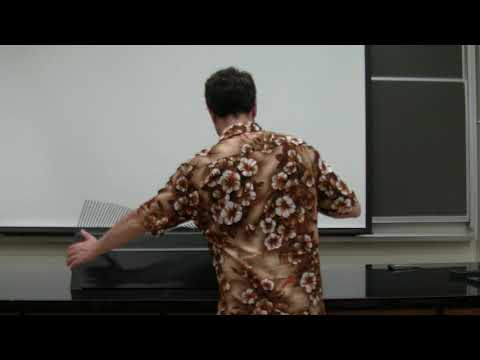

In [76]:
YouTubeVideo('Ki70ShYFtmA', width=560, height=315)

Here, I will illustrate this point with identical masses, coupled by identical springs (cf. King fig. 4.11, reproduced earlier), because it is simpler than the coupled pendula, but complex enough to illustrate the principle.
With two masses, we had
$$ m \ddot x_A = -k x_A + k(x_B - x_A), $$
$$ m \ddot x_B = -k (x_B - x_A) - kx_B. $$

With three masses $A$, $B$ and $C$, we would have
$$ m \ddot x_A = -k x_A + k(x_B - x_A), $$
$$ m \ddot x_B = -k (x_B - x_A) + k(x_C-x_B), $$
$$ m \ddot x_C = -k (x_C - x_B) - kx_C. $$

And with $N$ masses, we would have (I now index the masses with numbers instead of letters)
$$ m \ddot x_1 = -k x_1 + k(x_2 - x_1) = - 2 k x_1 + k x_2, $$
$$ m \ddot x_n = -k (x_{n} - x_{n-1}) + k(x_{n+1} - x_{n}) = k(x_{n+1} -2x_n + x_{n-1})\quad\forall n\neq 1, N, $$
$$ m \ddot x_N = -k (x_N - x_{N-1}) - kx_N = -2k x_N + k x_{N-1}. $$

After division by $m$, we can turn this system into an $N \times N$ eigenvalue problem
$$ (M^{-1}K - \omega^2 \textsf I_N) \vec X = 0, $$
with
$$ M^{-1}K = \omega_s^2\begin{bmatrix}
                 2      & -1     & 0      & \dots  &        &        & 0 \\
                 -1     & 2      & -1     & 0      & \dots  &        & 0 \\
                 0      & \ddots & \ddots & \ddots &        &        & \\
                 \vdots & 0      & -1     & 2      & -1     & 0      & \\
                        &        &        & \ddots & \ddots & \ddots & \\
                 \\
                 0      & \dots  &        &        & 0      & -1     & 2
             \end{bmatrix}.
$$

This matrix is actually simple enough that we could find the eigenvalues analytically.
My intention, however, is to show you that from a numerical point of view, a $3\times 3$ matrix and a $N\times N$ matrix are as hard to solve as each other as long as one understands how to use the methods of linear algebra.
Instead of `SymPy`, Python's main symbolic math package, I will use `NumPy`, Python's main scientific computing package.
Unlike `SymPy`, `NumPy` only understands numbers, not symbols.

In [77]:
# We already imported NumPy, but it is useful to import
# NumPy's linear algebra functions separately.
import numpy.linalg as LA
# the following two packages allow me to display the animation
from matplotlib import animation
from IPython.display import HTML
# More about animations: 
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter

In [86]:
N = 16  # number of oscillators

In [88]:
iMK = np.zeros((N, N))  # creates a NxN square matrix filled with zeros
# for simplicity, we set omega_s = 1 rad/s
# I will fill the matrix in a somewhat clumsy way, for pedagogical reasons
# However, there are functions to create tridiagonal matrices automatically
iMK[0, 0] = 2.  # top left-hand corner
iMK[0 , 1] = -1  # top line, one to the right
iMK[-1, -1] = 2  # bottom right-hand corner
iMK[-1, -2] = -1  # bottom line, one to the left
if N > 2:
    for n in range(1, N-1):  # this loop makes filling the matrix automatic
        # we loop from the second to the penultimate line, which are all the same
        iMK[n, n] = 2  # diagonal terms
        iMK[n, n-1] = -1  # lower diagonal
        iMK[n, n+1] = -1  # upper diagonal

print(iMK)  

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. 

In [89]:
eigvals, eigvecs = LA.eig(iMK)   

In [90]:
print(eigvals)

[3.9659462  3.86494446 3.70043427 3.47801783 3.20526927 2.89147671
 2.54732598 2.18453672 1.81546328 1.45267402 0.0340538  0.13505554
 0.29956573 0.52198217 0.79473073 1.10852329]


In [91]:
eigfreqs = np.sqrt(eigvals)
print(eigfreqs)

[1.99146835 1.9659462  1.92365129 1.86494446 1.79032658 1.70043427
 1.59603445 1.47801783 1.34739129 1.20526927 0.18453672 0.36749904
 0.54732598 0.72248333 0.89147671 1.05286433]


In [92]:
print(eigvecs)

[[ 0.06302556  0.12390487 -0.18056474 -0.2310757   0.27371765  0.30703848
  -0.32990347  0.341534   -0.341534    0.32990347 -0.06302556  0.12390487
  -0.18056474 -0.2310757   0.27371765 -0.30703848]
 [-0.12390487 -0.2310757   0.30703848  0.341534   -0.32990347 -0.27371765
   0.18056474 -0.06302556 -0.06302556  0.18056474 -0.12390487  0.2310757
  -0.30703848 -0.341534    0.32990347 -0.27371765]
 [ 0.18056474  0.30703848 -0.341534   -0.27371765  0.12390487 -0.06302556
   0.2310757  -0.32990347  0.32990347 -0.2310757  -0.18056474  0.30703848
  -0.341534   -0.27371765  0.12390487  0.06302556]
 [-0.2310757  -0.341534    0.27371765  0.06302556  0.18056474  0.32990347
  -0.30703848  0.12390487  0.12390487 -0.30703848 -0.2310757   0.341534
  -0.27371765 -0.06302556 -0.18056474  0.32990347]
 [ 0.27371765  0.32990347 -0.12390487  0.18056474 -0.341534   -0.2310757
  -0.06302556  0.30703848 -0.30703848  0.06302556 -0.27371765  0.32990347
  -0.12390487  0.18056474 -0.341534    0.2310757 ]
 [-0.3070

The `numpy.linalg.eig` function returns an output, that is different from the output of the SymPy `eigenvects` method we used earlier:

1. the first array lists all eigenvalues (repeated eigenvalues are simply written multiple times).
2. the second array provides the corresponding displacement amplitudes of each mass (the so-called polarization relations of each mode). The way it is displayed above, each column (`eigvecs[:, i]`) corresponds to the coefficients of the series of masses for one mode (e.g., all $a_n$ or $b_n$ for mode $n$), while each line (`eigvecs[i, :]`) corresponds to the coefficients of the series of modes for one mass (e.g., all $a_n$, $1 \leq n \leq N$, when there are $N$ modes).

It is still a bit obscure at this point, and plotting the results will help.
But before that, I want to sort the eigenfrequencies from lowest to highest, because ```numpy.linalg.eig``` does not necessarily do it.

In [93]:
print("Sequence that would sort the eigenfrequencies:")
seq = np.argsort(eigfreqs)
print(seq)

print()
print("Sorted eigenfrequencies:")
print(eigfreqs[seq])

print()
print("and the corresponding mass position amplitudes are")
for ii in range(N):
    print(eigvecs[:, seq[ii]])

Sequence that would sort the eigenfrequencies:
[10 11 12 13 14 15  9  8  7  6  5  4  3  2  1  0]

Sorted eigenfrequencies:
[0.18453672 0.36749904 0.54732598 0.72248333 0.89147671 1.05286433
 1.20526927 1.34739129 1.47801783 1.59603445 1.70043427 1.79032658
 1.86494446 1.92365129 1.9659462  1.99146835]

and the corresponding mass position amplitudes are
[-0.06302556 -0.12390487 -0.18056474 -0.2310757  -0.27371765 -0.30703848
 -0.32990347 -0.341534   -0.341534   -0.32990347 -0.30703848 -0.27371765
 -0.2310757  -0.18056474 -0.12390487 -0.06302556]
[ 0.12390487  0.2310757   0.30703848  0.341534    0.32990347  0.27371765
  0.18056474  0.06302556 -0.06302556 -0.18056474 -0.27371765 -0.32990347
 -0.341534   -0.30703848 -0.2310757  -0.12390487]
[-0.18056474 -0.30703848 -0.341534   -0.27371765 -0.12390487  0.06302556
  0.2310757   0.32990347  0.32990347  0.2310757   0.06302556 -0.12390487
 -0.27371765 -0.341534   -0.30703848 -0.18056474]
[-0.2310757  -0.341534   -0.27371765 -0.06302556  0.18056

In [94]:
# Various quantities
t_end = 2.*np.pi/eigfreqs.min() # time array spans one longest eigenperiod
n_frames = 100  # number of frames for animation
time = np.linspace(0., t_end, n_frames)  # time array
max_amp = abs(eigvecs.max())  # maximum displacement of any mass in any eigenmode
L_inter = 3*max_amp  # distance between the masses; this makes sure that it is enough
L_tot = L_inter*float(N+1)  # total length between the two walls;
rest_positions = np.arange(L_inter, (N+0.5)*L_inter, L_inter)  # positions at rest

# prepping the coordinates on the plot: for each time step, we will plot the positions
# on the x axis and the mode number on the y axis
x_positions = np.zeros((N, N))  # N positions for N modes
y_modes = np.zeros((N, N))  # N positions for N modes
for mode_number in range(1, N+1):
    y_modes[mode_number-1, :] = mode_number

imagelist = []  # list of frames to eventually animate

fig = plt.figure()
ax = plt.gca()
ax.set_xlim([0., L_tot])
ax.set_ylim([0., N+1])
ax.set_xticks(rest_positions)
ax.set_xlabel('positions')
ax.set_yticks(range(1, N+1))
ax.set_ylabel('mode number')
ax.grid()
for t in time:
    # We loop over time to animate the masses
    for mode_number in range(1, N+1):
        ii = seq[mode_number-1]  # this will select the correct mode in the list
        x_positions[mode_number-1, :] = (rest_positions
                                         + eigvecs[:, ii]*np.cos(eigfreqs[ii]*t))
    im = plt.scatter(x_positions, y_modes, c=y_modes, cmap='copper')
    imagelist.append([im])
    
ani = animation.ArtistAnimation(fig, imagelist, interval=50, blit=True, repeat_delay=1000)
plt.close()

In [95]:
# Show the animation
HTML(ani.to_html5_video())

In [ ]:
# Save the animation
ani.save('masses_for_{0:02d}_modes.mp4'.format(N), dpi=100)

The last command saves the animation as a ```.mp4``` video file. I saved a few and uploaded them onto Quercus.

A few comments.
You are not required to remember them at this point, but you will later on in this lecture series on waves and oscillations, so might as well start early.

* For some modes, some masses don't move, or hardly at all. Likewise, some masses move symmetrically around points that would be associated with zero velocity if they had a mass on them. Such points are called "nodes". In-between nodes are locations where the velocities seem larger. These points are called "antinodes". We will be able to visualize them better with waves on a string.
* The distance between two nodes corresponds to half a wavelength: every two nodes, the motion is periodic (spatial periodicity).
* The larger the mode number (or the frequency) is, the more nodes there are, or equivalently, the shorter the wavelengths are. As a matter of fact, the first mode has zero nodes, the second mode has one node, and the $n^{th}$ has $n-1$ nodes. This is a general feature of standing waves, again better visualized with waves on a string.
* Modes with more nodes are called "higher modes", those with less nodes are called "low", or "grave". The terminology comes from sound waves. Sound waves with larger wavelengths sound indeed graver (lower frequency) than sound waves with smaller wavelengths (higher frequencies).

